In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import copy
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
def fullen(s):
    return str(s).replace("*","⁎")

In [ ]:
df = pd.read_excel("data.xlsx")

In [4]:
# the whole

df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="whole")
df_odd["reg"] = df_odd.apply(lambda x:"{:.2f}{}({:.2f})".format(x["coef"], x["stars"], x["Std. err."]), axis=1)
table0 = df_odd[["tag","Women","Women%","Men","Men%","Total","Total%","reg","Sample_size"]]
table0[["Women","Women%","Men","Men%","Total","Total%"]] = table0[["Women","Women%","Men","Men%","Total","Total%"]].round(2)
table0.to_excel(r"hehe.xlsx")

In [6]:
# Sample distribution by career stage, area and gender
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

dfx = df[df["married_child"].isin([0,1])]

table = pd.crosstab([dfx["area"],dfx["gender_new"]],dfx["rank"])
all_area = table.sum(level="gender_new")
all_area.index = [("All areas",x) for x in all_area.index]
table = pd.concat([table,all_area],axis=0)
all_car = table.sum(axis=1)
all_car.name = "All ranks"
table = pd.concat([table,all_car],axis=1)
all_gender = table.sum(level="area")
all_gender.index = [(x, "All") for x in all_gender.index]
table = pd.concat([table,all_gender],axis=0)
table = pd.DataFrame(table,
                     index = pd.MultiIndex.from_product([area_order,genders]),
                    columns = rank_order)
table.to_excel(r"hehe.xlsx")

In [6]:
# sample respondents Rank/Role – Career Stage

area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

table = pd.crosstab([df["rank"],df["role_new"]],df["gender_new"], margins=True)
table.to_excel(r"hehe.xlsx")

In [7]:
# Sample respondents by Discipline- Disciplinary Area
df1 = df.copy()
df1["discipline_wos"].fillna("Manually categorized",inplace=True)

area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences","Arts & Humanities","All areas"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
genders = ["Women","Men","Non-binary","All"]

table = pd.crosstab([df1["area"],df1["discipline_wos"]],df1["gender_new"], margins=True,dropna=True)
table

gender_new                                                 Men  Non-binary  \
area                          discipline_wos                                 
Arts & Humanities             Arts                          23           0   
                              Humanities                   132           0   
                              Manually categorized          76           2   
                              Social Sciences                1           0   
Medical Sciences              Biomedical Research          463           5   
                              Clinical Medicine            228           3   
                              Health                        71           1   
                              Manually categorized         195           2   
Natural Science & Engineering Biology                      460           3   
                              Chemistry                     59           1   
                              Earth and Space               85           2   
                              Engineering and Technology   204           2   
                              Manually categorized         506           2   
                              Mathematics                   77           0   
                              Physics                       26           0   
Social Sciences               Manually categorized         278           1   
                              Professional Fields          220           3   
                              Psychology                    39           0   
                              Social Sciences              168           1   
All                                                       3311          28   

gender_new                                                Women   All  
area                          discipline_wos                           
Arts & Humanities             Arts                           48    71  
                              Humanities                    198   330  
                              Manually categorized          120   198  
                              Social Sciences                 0     1  
Medical Sciences              Biomedical Research           550  1018  
                              Clinical Medicine             563   794  
                              Health                        194   266  
                              Manually categorized          332   529  
Natural Science & Engineering Biology                       531   994  
                              Chemistry                      66   126  
                              Earth and Space               101   188  
                              Engineering and Technology     76   282  
                              Manually categorized          361   869  
                              Mathematics                    31   108  
                              Physics                        12    38  
Social Sciences               Manually categorized          491   770  
                              Professional Fields           394   617  
                              Psychology                    124   163  
                              Social Sciences               233   402  
All                                                        4425  7764

In [4]:
# remove those committed but don't know the partner career
df = df[~((df["is_researcher"].isnull()) & (df["married_child"] > 1))]
len(df)

7671

In [11]:
'''
"I am satisfied with the progress I have made \ntowards meeting my research achievement goals.",
"I am satisfied with the progress I have made \ntowards meeting my career achievement goals.",
"I have been recognized for \nmy contributions to scholarly communities.",
Please rate your overall satisfaction with your current or most recent marriage or partnership.
'''

satis = ["res_ach","car_dev","contrib"]

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                                1  \
res_ach                        -1.0       0.0         1.0       -1.0   
married_child gender_new                                               
0             Men         30.434783  3.260870   66.304348  22.404372   
              Total       25.498008  2.788845   71.713147  16.167665   
              Women       22.641509  2.515723   74.842767  12.578616   
1             Men          0.000000  0.000000  100.000000   0.000000   
              Total       26.666667  3.333333   70.000000  26.666667   
              Women       28.571429  3.571429   67.857143  28.571429   
2             Men         19.243986  3.092784   77.663230  14.186851   
              Total       20.642202  2.752294   76.605505  14.878209   
              Women       21.504237  2.542373   75.953390  15.302869   
3             Men         20.609177  2.492089   76.898734  14.573460   
              Total       25.048647  2.812666   72.138687  16.760962   
              Women       28.640000  3.072000   68.288000  18.533931   
All           Men         20.353698  2.604502   77.041801  14.501608   
              Women       26.984517  2.949128   70.066355  17.785978   
              Total       24.111993  2.799833   73.088174  16.362369   

                                                        2             \
res_ach                        0.0         1.0       -1.0        0.0   
married_child gender_new                                               
0             Men         3.825137   73.770492  13.186813   9.890110   
              Total       4.191617   79.640719  13.654618  10.240964   
              Women       4.402516   83.018868  13.924051  10.443038   
1             Men         0.000000  100.000000   0.000000  50.000000   
              Total       6.666667   66.666667  13.333333  20.000000   
              Women       7.142857   64.285714  14.285714  17.857143   
2             Men         3.979239   81.833910  11.398964   5.872193   
              Total       2.830810   82.290981  11.272248   6.460119   
              Women       2.125399   82.571732  11.194030   6.823028   
3             Men         2.922591   82.503949   9.877033   5.672352   
              Total       3.182461   80.056577  12.717276   6.420717   
              Women       3.393086   78.072983  15.014437   7.025987   
All           Men         3.118971   82.379421  10.161290   5.709677   
              Women       3.099631   79.114391  14.130703   6.979038   
              Total       3.108014   80.529617  12.410901   6.429071   

                                     
res_ach                         1.0  
married_child gender_new             
0             Men         76.923077  
              Total       76.104418  
              Women       75.632911  
1             Men         50.000000  
              Total       66.666667  
              Women       67.857143  
2             Men         82.728843  
              Total       82.267633  
              Women       81.982942  
3             Men         84.450615  
              Total       80.862008  
              Women       77.959577  
All           Men         84.129032  
              Women       78.890259  
              Total       81.160028

In [14]:
# generate table

questions = ["Research satisfaction",
"Career satisfaction",
"Community recognition",
"Career opportunities"]
options = ["Disagree","Neutral","Agree"]

table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])

# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="satis")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [2,3,"All"]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

table1 = pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[2,3,"All"],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
table1.to_excel(r"hehe.xlsx")

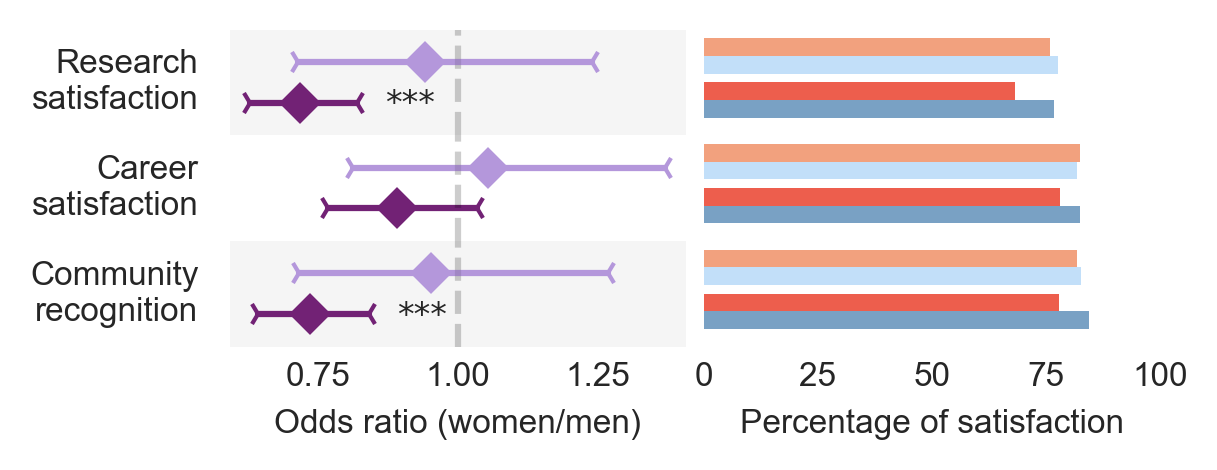

In [18]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="satis")
questions = ["Research\nsatisfaction",
"Career\nsatisfaction",
"Community\nrecognition"]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(4,1.4), dpi=300)

#the left graph

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

for i in range(len(questions)):
    ax1 = ax[i][0]
    for j in range(len(hue_order_set)):
        cut = (df_odd["group"]==j) & (df_odd["question"]==i)
        ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                   [j] * 2,
                  color = palette[j],
                  label = hue_order_set[j])
        # add dots
        ax1.plot(df_odd.loc[cut, "low"].values[0],
                   [j],
                   marker="4",
                  color = palette[j])
        ax1.plot(df_odd.loc[cut, "up"].values[0],
                   [j],
                   marker="3",
                  color = palette[j])
        ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                   [j],
                   marker="D",
                  color = palette[j])
        
        ax1.set_ylim(-0.8,1.8)
        ax1.set_xlabel("Odds ratio (women/men)",loc="center",fontsize=8)
        ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
        ax1.tick_params(axis='both', labelsize=8)
        ax1.set_yticklabels([])
        ax1.axvline(x = 1, linestyle ='--', color="black",alpha=0.1)
        if i % 2==0:
            ax1.set_facecolor("whitesmoke")
        if i != len(questions) -1:
            ax1.set_xlabel(None)

        #add significance stars
        if not df_odd.loc[cut, "stars"].isnull().all():
            ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                       j,
                        fullen(df_odd.loc[cut, "stars"].values[0]),
                        font="DejaVu Sans",fontsize=8)
        
    diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
    if not pd.isna(diffstar):
        ax1.text(1.3, 0.25, "("+fullen(diffstar)+")",font="DejaVu Sans",fontsize=7)

        
# the right graph
mc =  [2,3]
mctext = ["non-parent","parent"]

for m in range(2):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[1], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[1], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of satisfaction",loc="center",fontsize=8)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.6)
        ax2.set_xlim(0,100)
        ax2.set_yticklabels([])
        if q != len(questions) -1:
            ax2.set_xlabel(None)

sns.despine(left=True, bottom=True, right=True)
# handles, labels = ax[-1].get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax[-1].legend(handles, labels, ncol=2, bbox_to_anchor=(0.15, -0.5), loc='upper left',fontsize=9)


plt.subplots_adjust(hspace = 0, wspace = 0.04)
plt.show()
fig.savefig('satisfaction.png', bbox_inches='tight', pad_inches = 0)

In [20]:
#marriage impact, child impact

satis = ["marriage_impact", "child_impact"]

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                                 1  \
marriage_impact                -1.0         0.0        1.0       -1.0   
married_child gender_new                                                
0             Men          0.000000   50.000000  50.000000        NaN   
              Total       11.111111   44.444444  44.444444        NaN   
              Women       20.000000   40.000000  40.000000        NaN   
1             Men               NaN         NaN        NaN   0.000000   
              Total        0.000000  100.000000   0.000000  76.666667   
              Women        0.000000  100.000000   0.000000  82.142857   
2             Men         16.000000   13.565217  70.434783        NaN   
              Total       16.226913   11.279683  72.493404        NaN   
              Women       16.365569    9.883103  73.751328        NaN   
3             Men         18.217822    8.277228  73.504950  48.616601   
              Total       20.219936    8.354026  71.426038  61.100266   
              Women       21.843881    8.416319  69.739801  71.272142   
All           Men         17.806452    9.258065  72.935484  48.616601   
              Women       20.572274    8.756783  70.670942  71.272142   
              Total       19.373777    8.974001  71.652223  61.100266   

                                                 
marriage_impact                  0.0        1.0  
married_child gender_new                         
0             Men                NaN        NaN  
              Total              NaN        NaN  
              Women              NaN        NaN  
1             Men         100.000000   0.000000  
              Total        16.666667   6.666667  
              Women        10.714286   7.142857  
2             Men                NaN        NaN  
              Total              NaN        NaN  
              Women              NaN        NaN  
3             Men          26.166008  25.217391  
              Total        19.822538  19.077196  
              Women        14.653784  14.074074  
All           Men          26.166008  25.217391  
              Women        14.653784  14.074074  
              Total        19.822538  19.077196

In [27]:
# generate table

questions = ["Commitment impact \non career development",
             "Child impact \non career development",]
options = ["Negative","Neutral","Positive"]

table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])
    
# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q11+15")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [2,3,"All"]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

table2 = pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[2,3,"All"],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
table2.to_excel(r"hehe.xlsx")

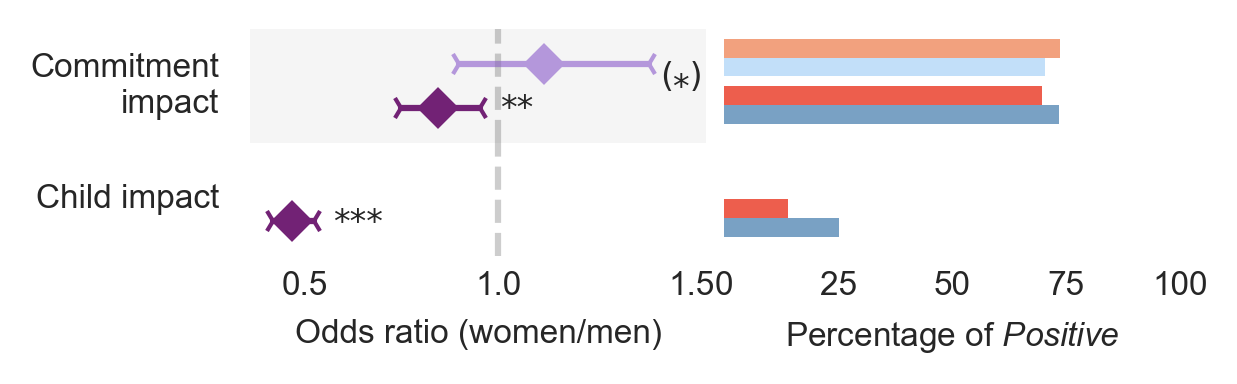

In [25]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q11+15")
questions = ["Commitment\nimpact",
             "Child impact"]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(4,1), dpi=300)

#the left graph

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)
            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                       [j] * 2,
                      color = palette[j],
                      label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                       [j],
                       marker="4",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                       [j],
                       marker="3",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                       [j],
                       marker="D",
                      color = palette[j])

            ax1.set_ylim(-0.8,1.8)
            ax1.set_xlabel("Odds ratio (women/men)",loc="center",fontsize=8)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")
            if i != len(questions) -1:
                ax1.set_xlabel(None)

            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                           j,
                        fullen(df_odd.loc[cut, "stars"].values[0]),
                        font="DejaVu Sans",fontsize=8)

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(1.42, 0.5,"("+fullen(diffstar)+")",font="DejaVu Sans",fontsize=8)
except:
    pass
        
# the right graph
mc =  [2,3]
mctext = ["non-parent","parent"]

for m in range(2):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[1], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[1], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Positive}$",loc="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.6)
        ax2.set_xlim(0,100)
        ax2.set_yticklabels([])
        if q != len(questions) -1:
            ax2.set_xlabel(None)

xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.1)
sns.despine(left=True, bottom=True, right=True)
# handles, labels = ax[-1].get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax[-1].legend(handles, labels, ncol=2, bbox_to_anchor=(0.15, -0.5), loc='upper left',fontsize=9)


plt.subplots_adjust(hspace = 0, wspace = 0.04)
plt.show()
fig.savefig('impact.png', bbox_inches='tight', pad_inches = 0)

In [26]:
# impediment

satis = "emo_pres wf_conf dec_nsup mar_diss net_cons".split()

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                                   \
emo_pres                        0.0        1.0        2.0        3.0   
married_child gender_new                                               
0             Men         66.666667   0.000000  33.333333   0.000000   
              Total       62.500000  12.500000  12.500000  12.500000   
              Women       60.000000  20.000000   0.000000  20.000000   
1             Total       75.000000   0.000000  25.000000   0.000000   
              Women       75.000000   0.000000  25.000000   0.000000   
2             Men         61.071429  22.500000   7.678571   8.750000   
              Total       62.038900  20.657277   8.517773   8.786050   
              Women       62.620838  19.548872   9.022556   8.807734   
3             Men         54.154958  24.769169  13.247692   7.828181   
              Total       55.957523  23.164147  12.077034   8.801296   
              Women       57.422512  21.859706  11.125612   9.592170   
All           Men         55.424451  24.352671  12.225500   7.997378   
              Women       58.633634  21.321321  10.635636   9.409409   
              Total       57.244217  22.633745  11.323968   8.798070   

                                  1                                   \
emo_pres                        0.0        1.0        2.0        3.0   
married_child gender_new                                               
0             Men         66.666667  33.333333   0.000000   0.000000   
              Total       42.857143  57.142857   0.000000   0.000000   
              Women       25.000000  75.000000   0.000000   0.000000   
1             Total       50.000000   0.000000  25.000000  25.000000   
              Women       50.000000   0.000000  25.000000  25.000000   
2             Men         52.919708  28.649635  11.678832   6.751825   
              Total       52.225313  28.929068  11.961057   6.884562   
              Women       51.797753  29.101124  12.134831   6.966292   
3             Men         27.572347  33.400322  24.316720  14.710611   
              Total       24.115640  31.783085  24.995511  19.105764   
              Women       21.324245  30.477118  25.543655  22.654982   
All           Men         32.147563  32.542819  22.035573  13.274045   
              Women       28.154117  30.168723  22.538403  19.138756   
              Total       29.884401  31.197374  22.320537  16.597688   

                                   2                                   \
emo_pres                         0.0        1.0        2.0        3.0   
married_child gender_new                                                
0             Men         100.000000   0.000000   0.000000   0.000000   
              Total        83.333333   0.000000   0.000000  16.666667   
              Women        66.666667   0.000000   0.000000  33.333333   
1             Total        75.000000   0.000000  25.000000   0.000000   
              Women        75.000000   0.000000  25.000000   0.000000   
2             Men          62.288931  19.887430  10.131332   7.692308   
              Total        62.579281  19.027484   9.654686   8.738548   
              Women        62.753950  18.510158   9.367946   9.367946   
3             Men          60.403531  21.857923  11.097100   6.641446   
              Total        60.189665  20.011612  10.818657   8.980066   
              Women        60.007174  18.436155  10.581062  10.975610   
All           Men          60.748626  21.497253  10.920330   6.833791   
              Women        60.669570  18.454001  10.288514  10.587915   
              Total        60.704525  19.799575  10.567871   8.928029   

                                  3                                   \
emo_pres                        0.0        1.0        2.0        3.0   
married_child gender_new                                               
0             Men         66.666667  33.333333   0.000000   0.000000   
              Total       71.428571  28.571429   0.000

In [26]:
questions = ["Emotional pressure",
"Career-family conflict",
"Decision nonsupport",
"Marital dissatisfaction",
"Network constrains"]
options = ["Not at all","A little","Moderate","Substantial"]

# generate table

table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])
for r in [2,3]:
    table[(r,"Diff.")]=table[(r,"Women")]-table[(r,"Men")]
    
# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="impediment")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [2,3,"All"]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

table3 = pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[2,3,"All"],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
table3.to_excel(r"hehe.xlsx")

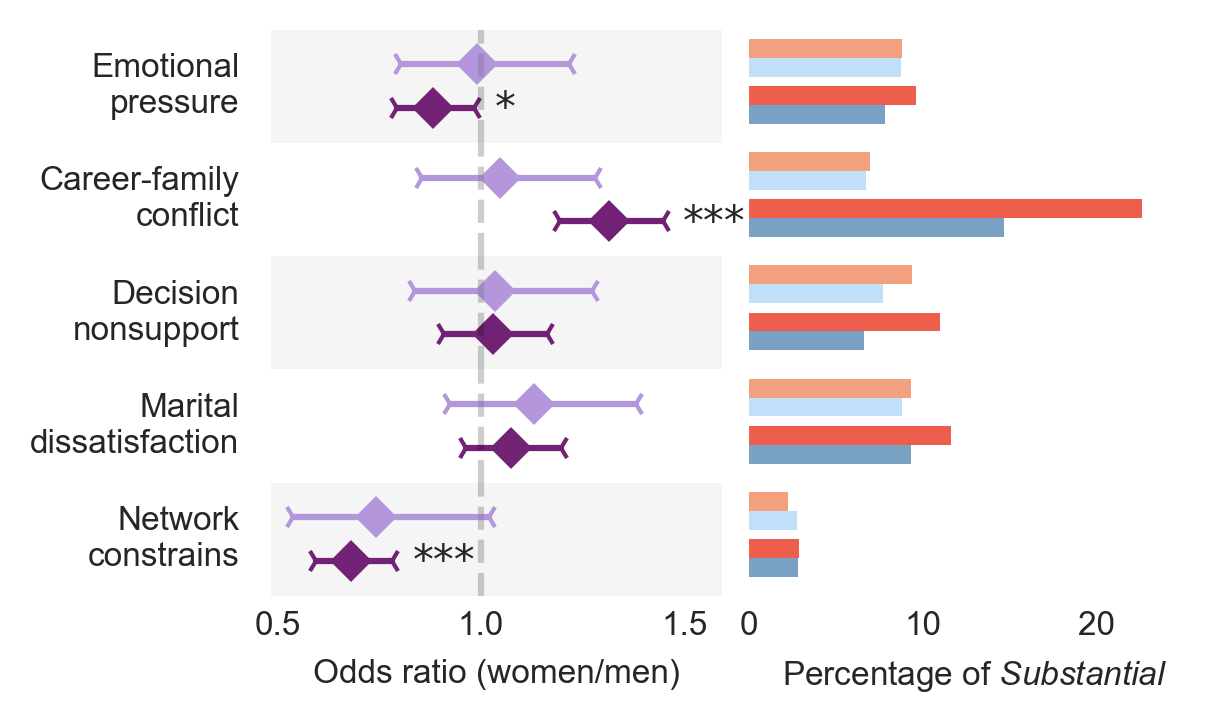

In [27]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="impediment")
questions = ["Emotional\npressure",
"Career-family\nconflict",
"Decision\nnonsupport",
"Marital\ndissatisfaction",
"Network\nconstrains"]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(4,2.5), dpi=300)

#the left graph

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)
            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                       [j] * 2,
                      color = palette[j],
                      label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                       [j],
                       marker="4",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                       [j],
                       marker="3",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                       [j],
                       marker="D",
                      color = palette[j])

            ax1.set_ylim(-0.8,1.8)
            ax1.set_xlabel("Odds ratio (women/men)",loc="center",fontsize=8)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")

            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                           j,
                        fullen(df_odd.loc[cut, "stars"].values[0]),
                        font="DejaVu Sans")

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(1.3, 0.5,"("+fullen(diffstar)+")",font="DejaVu Sans")
except:
    pass
        
# the right graph
mc =  [2,3]
mctext = ["non-parent","parent"]

for m in range(2):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[3], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[3], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Substantial}$",loc="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.6)
        ax2.set_xlim(0,26)
        ax2.set_yticklabels([])

xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.1)
sns.despine(left=True, bottom=True, right=True)
# handles, labels = ax[-1].get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax[-1].legend(handles, labels, ncol=2, bbox_to_anchor=(0.15, -0.5), loc='upper left',fontsize=9)


plt.subplots_adjust(hspace = 0, wspace = 0.06)
plt.show()
fig.savefig('impede.png', bbox_inches='tight', pad_inches = 0)

In [29]:
satis = ["tim_conf", "str_conf","beh_conf"]

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                                   \
tim_conf                         0.0        1.0        2.0        3.0   
married_child gender_new                                                
0             Men         100.000000   0.000000   0.000000   0.000000   
              Total        55.555556   0.000000  11.111111  33.333333   
              Women        20.000000   0.000000  20.000000  60.000000   
1             Total        20.000000  20.000000  20.000000  40.000000   
              Women        20.000000  20.000000  20.000000  40.000000   
2             Men          13.957597  24.911661  33.745583  27.385159   
              Total        11.111111  23.293173  31.057564  34.538153   
              Women         9.375000  22.306034  29.418103  38.900862   
3             Men           6.013540  20.430108  34.846675  38.709677   
              Total         3.841366  16.894896  31.709052  47.554686   
              Women         2.088689  14.042416  29.177378  54.691517   
All           Men           7.474813  21.254469  34.644134  36.626584   
              Women         3.762376  15.940594  29.232673  51.064356   
              Total         5.367430  18.238022  31.572292  44.822257   

                                   1                                   \
tim_conf                         0.0        1.0        2.0        3.0   
married_child gender_new                                                
0             Men         100.000000   0.000000   0.000000   0.000000   
              Total        77.777778   0.000000  11.111111  11.111111   
              Women        60.000000   0.000000  20.000000  20.000000   
1             Total        20.000000   0.000000  40.000000  40.000000   
              Women        20.000000   0.000000  40.000000  40.000000   
2             Men          31.382979  34.574468  20.035461  14.007092   
              Total        29.704301  32.795699  22.311828  15.188172   
              Women        28.679654  31.709957  23.701299  15.909091   
3             Men          18.283433  32.854291  28.383234  20.479042   
              Total        14.031022  30.201462  29.577465  26.190052   
              Women        10.599227  28.060567  30.541237  30.798969   
All           Men          20.690779  33.170414  26.849137  19.289671   
              Women        14.746773  28.897716  28.972195  27.383317   
              Total        17.317176  30.745385  28.054107  23.883331   

                                   2                                   
tim_conf                         0.0        1.0        2.0        3.0  
married_child gender_new                                               
0             Men         100.000000   0.000000   0.000000   0.000000  
              Total        77.777778  22.222222   0.000000   0.000000  
              Women        60.000000  40.000000   0.000000   0.000000  
1             Total        40.000000  20.000000  40.000000   0.000000  
              Women        40.000000  20.000000  40.000000   0.000000  
2             Men          71.301248  13.903743   9.625668   5.169340  
              Total        66.644114  15.493911  10.419486   7.442490  
              Women        63.794984  16.466739  10.905125   8.833152  
3             Men          61.770624  18.712274  11.670020   7.847082  
              Total        59.184773  18.225893  12.677321   9.912013  
              Women        57.101167  17.833982  13.488975  11.575875  
All           Men          63.525936  17.826658  11.293500   7.353907  
              Women        58.635341  17.520620  12.896776  10.947263  
              Total        60.749255  17.652902  12.203775   9.394068

In [30]:
questions = ["Time-based",
"Strain-based",
"Behavior-based",]
options = ["Not at all","A little","Moderate","Substantial"]

# generate table

table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])
for r in [2,3]:
    table[(r,"Diff.")]=table[(r,"Women")]-table[(r,"Men")]
    
# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="work_conflict")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [2,3,"All"]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

table4 = pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[2,3,"All"],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
table4.to_excel(r"hehe.xlsx")

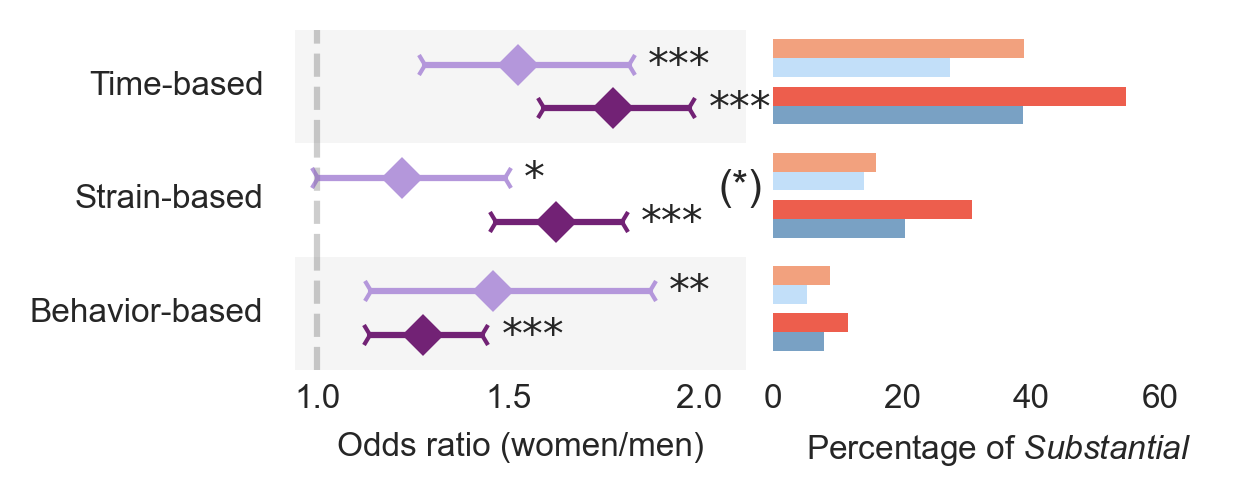

In [31]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="work_conflict")
questions = ["Time-based",
"Strain-based",
"Behavior-based",]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(4,1.5), dpi=300)

#the left graph

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)
            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                       [j] * 2,
                      color = palette[j],
                      label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                       [j],
                       marker="4",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                       [j],
                       marker="3",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                       [j],
                       marker="D",
                      color = palette[j])

            ax1.set_ylim(-0.8,1.8)
            ax1.set_xlabel("Odds ratio (women/men)",loc="center",fontsize=8)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")

            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                           j,
                          fullen(df_odd.loc[cut, "stars"].values[0]),
                         font="DejaVu Sans")

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(2.05, 0.5, "("+diffstar+")")
except:
    pass
        
# the right graph
mc =  [2,3]
mctext = ["non-parent","parent"]

for m in range(2):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[3], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[3], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Substantial}$",loc="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.6)
        ax2.set_xlim(0,70)
        ax2.set_yticklabels([])

xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.1)
sns.despine(left=True, bottom=True, right=True)
# handles, labels = ax[-1].get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax[-1].legend(handles, labels, ncol=2, bbox_to_anchor=(0.15, -0.5), loc='upper left',fontsize=9)


plt.subplots_adjust(hspace = 0, wspace = 0.06)
plt.show()
fig.savefig('conflict.png', bbox_inches='tight', pad_inches = 0)

In [32]:
satis = ["fin_sup", "emo_sup", "time_sup", "dec_sup", "tec_sup", "net_sup"]

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                                   \
fin_sup                         0.0        1.0        2.0        3.0   
married_child gender_new                                               
0             Men         66.666667  33.333333   0.000000   0.000000   
              Total       60.000000  40.000000   0.000000   0.000000   
              Women       50.000000  50.000000   0.000000   0.000000   
1             Total       75.000000  25.000000   0.000000   0.000000   
              Women       75.000000  25.000000   0.000000   0.000000   
2             Men         30.144404  30.685921  20.758123  18.411552   
              Total       30.369357  26.607387  22.024624  20.998632   
              Women       30.506608  24.118943  22.797357  22.577093   
3             Men         24.380333  27.184072  24.583503  23.852093   
              Total       20.087575  23.280423  24.119686  32.512315   
              Women       16.589404  20.099338  23.741722  39.569536   
All           Men         25.439469  27.827529  23.880597  22.852405   
              Women       19.806517  21.028513  23.523422  35.641548   
              Total       22.252629  23.980988  23.678525  30.087858   

                                  1                                    \
fin_sup                         0.0        1.0         2.0        3.0   
married_child gender_new                                                
0             Men          0.000000   0.000000  100.000000   0.000000   
              Total       12.500000   0.000000   50.000000  37.500000   
              Women       20.000000   0.000000   20.000000  60.000000   
1             Total       50.000000  25.000000   25.000000   0.000000   
              Women       50.000000  25.000000   25.000000   0.000000   
2             Men          1.953819   7.992895   19.715808  70.337478   
              Total        1.604278   8.021390   18.114973  72.259358   
              Women        1.393355   8.038585   17.148982  73.419078   
3             Men          2.363782  11.698718   22.596154  63.341346   
              Total        2.824455  12.102252   23.131927  61.941366   
              Women        3.195610  12.427372   23.563589  60.813428   
All           Men          2.288330  11.016672   22.066035  64.628964   
              Women        2.778467  11.411560   22.078889  63.731084   
              Total        2.566996  11.241185   22.073343  64.118477   

                                  2             ...          3             \
fin_sup                         0.0        1.0  ...        2.0        3.0   
married_child gender_new                        ...                         
0             Men         66.666667   0.000000  ...  33.333333  33.333333   
              Total       25.000000  25.000000  ...  50.000000  16.666667   
              Women        0.000000  40.000000  ...  66.666667   0.000000   
1             Total       50.000000   0.000000  ...  50.000000  25.000000   
              Women       50.000000   0.000000  ...  50.000000  25.000000   
2             Men          8.037383  22.803738  ...  25.800377  48.775895   
              Total        7.188161  21.775899  ...  24.167873  52.821997   
              Women        6.674208  21.153846  ...  23.149236  55.346651   
3             Men          2.625103   8.367514  ...  27.723195  49.850491   
              Total        3.398764  13.994911  ...  25.939630  49.230769   
              Women        4.014360  18.472585  ...  24.445240  48.711525   
All           Men          3.599058  10.965355  ...  27.367688  49.651811   
              Women        4.609929  19.072948  ...  24.142661  50.260631   
              Total        4.175697  15.590233  ...  25.563910  49.992328   

                                  4                                   \
fin_sup                         0.0        1.0        2.0        3.0   
married_child gender_new                                               
0             Men         66.666667  33.3

In [31]:
questions = ["Financial support",
          "Emotional support",
          "Time support",
          "Decision support",
          "Technical support",
          "Network support",
            "Childcare support"]
options = ["Not at all","A little","Moderate","Substantial"]

# generate table
table = res.drop([0,1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])
for r in [2,3]:
    table[(r,"Diff.")]=table[(r,"Women")]-table[(r,"Men")]
    
# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="support")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [2,3,"All"]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

table5= pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[2,3,"All"],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
table5.to_excel(r"hehe.xlsx")

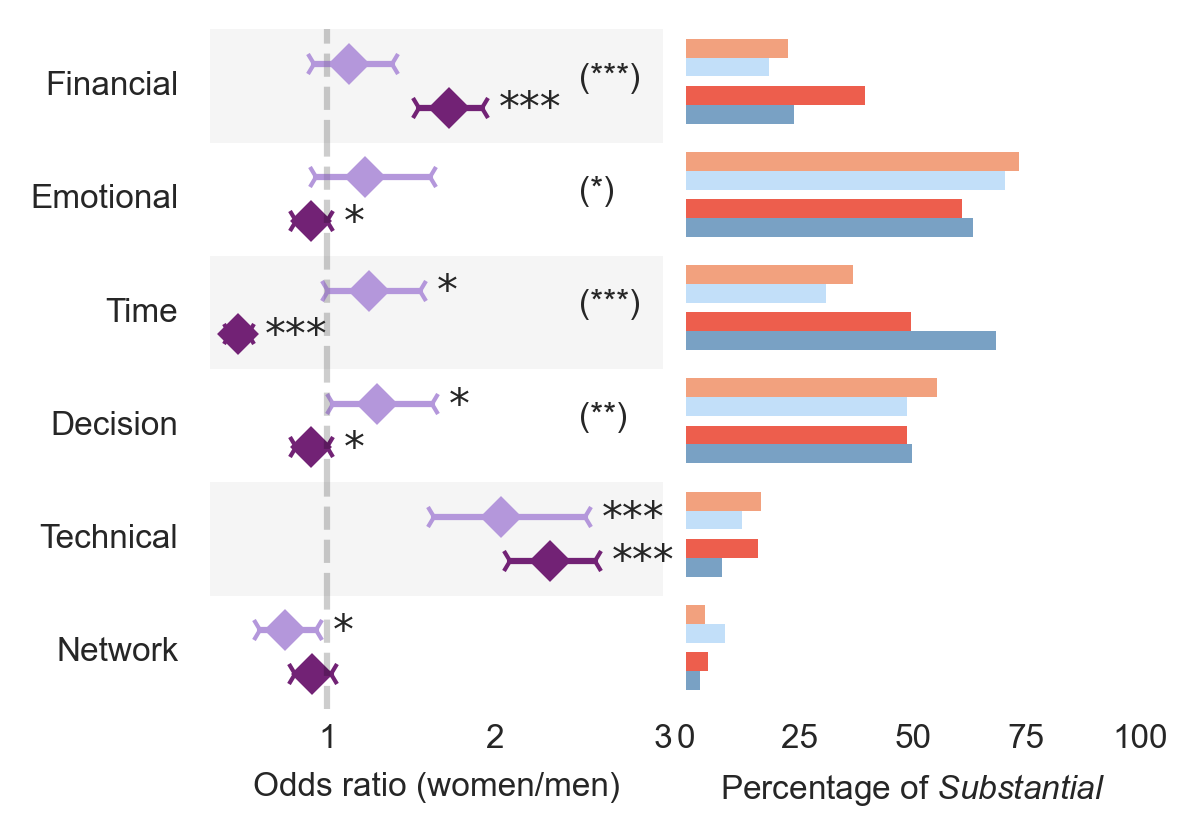

In [36]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="support")
questions = ["Financial",
          "Emotional",
          "Time",
          "Decision",
          "Technical",
          "Network"]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(4,3), dpi=300)

#the left graph

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)
            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                       [j] * 2,
                      color = palette[j],
                      label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                       [j],
                       marker="4",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                       [j],
                       marker="3",
                      color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                       [j],
                       marker="D",
                      color = palette[j])

            ax1.set_ylim(-0.8,1.8)
            ax1.set_xlabel("Odds ratio (women/men)",loc="center",fontsize=8)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")

            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.1,
                           j,
                          fullen(df_odd.loc[cut, "stars"].values[0]),
                         font="DejaVu Sans")

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(2.5, 0.5, "("+diffstar+")",fontsize=8)
except:
    pass
        
# the right graph
mc =  [2,3]
mctext = ["non-parent","parent"]

for m in range(2):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[3], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[3], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Substantial}$",loc="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.6)
        ax2.set_xlim(0,100)
        ax2.set_yticklabels([])

xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.3)
sns.despine(left=True, bottom=True, right=True)
# handles, labels = ax[-1].get_legend_handles_labels()
# # sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# ax[-1].legend(handles, labels, ncol=2, bbox_to_anchor=(0.15, -0.5), loc='upper left',fontsize=9)


plt.subplots_adjust(hspace = 0, wspace = 0.05)
plt.show()
fig.savefig('support.png', bbox_inches='tight', pad_inches = 0)

In [12]:
satis = "ch_weak_motiv ch_weak_efficiency ch_weak_time ch_weak_abil ch_weak_network ch_weak_oppo".split()

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                      1             \
ch_weak_motiv                    0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        48.275862  51.724138   51.724138  48.275862   
              Women        46.428571  53.571429   50.000000  50.000000   
3             Men          70.311253  29.688747   55.826018  44.173982   
              Total        64.145558  35.854442   57.545487  42.454513   
              Women        59.161290  40.838710   58.935484  41.064516   
All           Men          70.311253  29.688747   55.826018  44.173982   
              Women        59.161290  40.838710   58.935484  41.064516   
              Total        64.145558  35.854442   57.545487  42.454513   

                                   2                      3             \
ch_weak_motiv                    0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        24.137931  75.862069   58.620690  41.379310   
              Women        21.428571  78.571429   57.142857  42.857143   
3             Men          40.303272  59.696728   81.644054  18.355946   
              Total        35.319301  64.680699   77.916518  22.083482   
              Women        31.290323  68.709677   74.903226  25.096774   
All           Men          40.303272  59.696728   81.644054  18.355946   
              Women        31.290323  68.709677   74.903226  25.096774   
              Total        35.319301  64.680699   77.916518  22.083482   

                                   4                      5             
ch_weak_motiv                    0.0        1.0         0.0        1.0  
married_child gender_new                                                
1             Men         100.000000   0.000000  100.000000   0.000000  
              Total        31.034483  68.965517   31.034483  68.965517  
              Women        28.571429  71.428571   28.571429  71.428571  
3             Men          59.736632  40.263368   66.400638  33.599362  
              Total        47.930788  52.069212   55.208705  44.791295  
              Women        38.387097  61.612903   46.161290  53.838710  
All           Men          59.736632  40.263368   66.400638  33.599362  
              Women        38.387097  61.612903   46.161290  53.838710  
              Total        47.930788  52.069212   55.208705  44.791295

In [14]:
questions = ['Weaker working motivation',
'Lower working efficiency',
'Shorter working time',
'Lower working competence',
'Narrowed work related \nnetworking opportunities',
'Fewer career development \nopportunities']
options = ["No","Yes"]

# generate table
table = res.drop([1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])

# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q16 Weak")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [3]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

t3= pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[3],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
t3.to_excel(r"hehe.xlsx")

In [16]:
satis = "ch_strong_motiv ch_strong_efficiency ch_strong_time ch_strong_abil ch_strong_network ch_strong_oppo".split()

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                      1             \
ch_strong_motiv                  0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        51.724138  48.275862   44.827586  55.172414   
              Women        50.000000  50.000000   42.857143  57.142857   
3             Men          59.457302  40.542698   65.243416  34.756584   
              Total        60.631466  39.368534   52.497324  47.502676   
              Women        61.580645  38.419355   42.193548  57.806452   
All           Men          59.457302  40.542698   65.243416  34.756584   
              Women        61.580645  38.419355   42.193548  57.806452   
              Total        60.631466  39.368534   52.497324  47.502676   

                                   2                      3             \
ch_strong_motiv                  0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        86.206897  13.793103   82.758621  17.241379   
              Women        85.714286  14.285714   82.142857  17.857143   
3             Men          81.963288  18.036712   86.233041  13.766959   
              Total        81.466286  18.533714   82.643596  17.356404   
              Women        81.064516  18.935484   79.741935  20.258065   
All           Men          81.963288  18.036712   86.233041  13.766959   
              Women        81.064516  18.935484   79.741935  20.258065   
              Total        81.466286  18.533714   82.643596  17.356404   

                                   4                     5            
ch_strong_motiv                  0.0       1.0         0.0       1.0  
married_child gender_new                                              
1             Men         100.000000  0.000000  100.000000  0.000000  
              Total        93.103448  6.896552   96.551724  3.448276  
              Women        92.857143  7.142857   96.428571  3.571429  
3             Men          91.260974  8.739026   97.047087  2.952913  
              Total        91.419907  8.580093   97.556190  2.443810  
              Women        91.548387  8.451613   97.967742  2.032258  
All           Men          91.260974  8.739026   97.047087  2.952913  
              Women        91.548387  8.451613   97.967742  2.032258  
              Total        91.419907  8.580093   97.556190  2.443810

In [17]:
questions = ['Stronger working motivation',
'Higher working efficiency',
'Longer working time',
'Higher working competence',
'Expanded work related \nnetworking opportunities',
'More career \ndevelopment opportunities'
]
options = ["No", "Yes"]

# generate table
table = res.drop([1],level="married_child")
table.columns = pd.MultiIndex.from_product([questions,options],names=["question","option"])
table = table.stack(level=["question","option"]).unstack(level=["married_child","gender_new"])

# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q16 Strong")

col = ["Women","Men","Total"]
for s in range(len(questions)):
    for r in [3]:
        if r == 2 or r == 3:
            cut = (df_odd["group"]==3-r) & (df_odd["question"]==s)
        if r == "All":
            cut = (df_odd["group"]==2) & (df_odd["question"]==s)
        coef = df_odd.loc[cut, "Odds ratio (women/men)"].values[0]
        stars = df_odd.loc[cut, "stars"].values[0]
        std = df_odd.loc[cut, "Std. err."].values[0]
        pval = df_odd.loc[cut,"P>z"].values[0]
        low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
        info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
        table.loc[(questions[s],"OR, 95% CI, p value"),(r,"Women")] = info
        for g in col:
            if r == "All":
                if g != "Total":
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"].isin([2,3])) & (df["gender_new"] != "Non-binary")
            else:
                if g != "Total":
                    cut2 = (df["married_child"]==r) & (df["gender_new"]==g)
                else:
                    cut2 = (df["married_child"]==r) & (df["gender_new"] != "Non-binary")
            table.loc[(questions[s],"#"),(r,g)] = sum(~df.loc[cut2, satis[s]].isnull())

t4= pd.DataFrame(table,
             columns=pd.MultiIndex.from_product([[3],col]),
             index=pd.MultiIndex.from_product([questions,options+["#","OR, 95% CI, p value"]])).round(2)
t4.to_excel(r"hehe.xlsx")

In [50]:
satis = "ch_weak_motiv ch_weak_efficiency ch_weak_time ch_weak_abil ch_weak_network ch_weak_oppo".split()

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                      1             \
ch_weak_motiv                    0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        48.275862  51.724138   51.724138  48.275862   
              Women        46.428571  53.571429   50.000000  50.000000   
3             Men          70.311253  29.688747   55.826018  44.173982   
              Total        64.145558  35.854442   57.545487  42.454513   
              Women        59.161290  40.838710   58.935484  41.064516   
All           Men          70.311253  29.688747   55.826018  44.173982   
              Women        59.161290  40.838710   58.935484  41.064516   
              Total        64.145558  35.854442   57.545487  42.454513   

                                   2                      3             \
ch_weak_motiv                    0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        24.137931  75.862069   58.620690  41.379310   
              Women        21.428571  78.571429   57.142857  42.857143   
3             Men          40.303272  59.696728   81.644054  18.355946   
              Total        35.319301  64.680699   77.916518  22.083482   
              Women        31.290323  68.709677   74.903226  25.096774   
All           Men          40.303272  59.696728   81.644054  18.355946   
              Women        31.290323  68.709677   74.903226  25.096774   
              Total        35.319301  64.680699   77.916518  22.083482   

                                   4                      5             
ch_weak_motiv                    0.0        1.0         0.0        1.0  
married_child gender_new                                                
1             Men         100.000000   0.000000  100.000000   0.000000  
              Total        31.034483  68.965517   31.034483  68.965517  
              Women        28.571429  71.428571   28.571429  71.428571  
3             Men          59.736632  40.263368   66.400638  33.599362  
              Total        47.930788  52.069212   55.208705  44.791295  
              Women        38.387097  61.612903   46.161290  53.838710  
All           Men          59.736632  40.263368   66.400638  33.599362  
              Women        38.387097  61.612903   46.161290  53.838710  
              Total        47.930788  52.069212   55.208705  44.791295

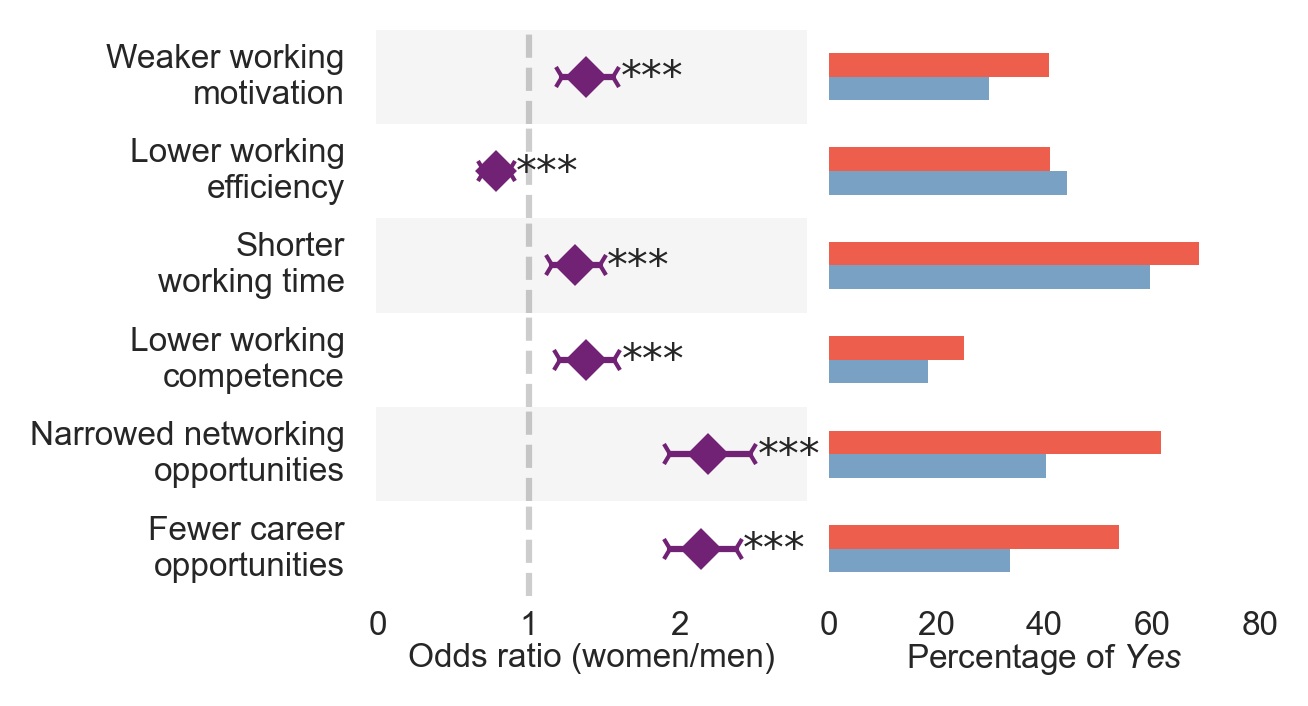

In [51]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q16 Weak")

questions = ['Weaker working\nmotivation',
'Lower working\nefficiency',
'Shorter\nworking time',
'Lower working\ncompetence',
'Narrowed networking\nopportunities',
'Fewer career\nopportunities']

plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(3.8,2.5), dpi=300)

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)

            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                    [j] * 2,
                    color = palette[j],
                    label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                    [j],
                    marker="4",
                    color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                    [j],
                    marker="3",
                    color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                    [j],
                    marker="D",
                    color = palette[j])

            ax1.set_ylim(-0.5,0.5)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_xlabel("Odds ratio (women/men)", y= 0.04, ha="center",va="center",fontsize=8)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")
                ax1.set_xlim(0,2.5)
            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                        j,
                       fullen(df_odd.loc[cut, "stars"].values[0]),font="DejaVu Sans")

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(1.45+0.1, 0.5, "("+diffstar+")")
except Exception as e:
        print(e)

# the right graph
mc =  [3]
mctext = ["non-parent","parent"]

for m in range(1):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[1], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[1], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Yes}$",y= 0.04, ha="center",va="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.4)
        ax2.set_xlim(0,80)
        ax2.set_yticklabels([])
        
xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.34)
# xmin, xmax = ax[0][1].get_xlim()
# ax[0][1].set_xlim(xmin-0.01, xmax+0.34)
sns.despine(left=True, bottom=True, right=True)

plt.subplots_adjust(hspace = 0, wspace = 0.05)
plt.show()
fig.savefig('weak.png', bbox_inches='tight', pad_inches = 0)

In [52]:
satis = "ch_strong_motiv ch_strong_efficiency ch_strong_time ch_strong_abil ch_strong_network ch_strong_oppo".split()

res = pd.DataFrame()
for i in range(len(satis)):
    a = pd.crosstab([df["married_child"],df["gender_new"]],df[satis[i]]).drop(["Non-binary"], level="gender_new")
    total = a.sum(level=[0], axis=0)
    total.index = pd.MultiIndex.from_product([total.index, ["Total"]])
    a = pd.concat([a,total],axis=0).sort_index(level=0)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res = pd.concat([res,a],axis=1)

res2 = pd.DataFrame()
df1 = df[df["married_child"].isin([2,3])]
for i in range(len(satis)):
    a = pd.crosstab(df1["gender_new"],df1[satis[i]]).drop(["Non-binary"])
    total = a.sum(axis=0)
    total.name = "Total"
    a = a.append(total)
    a = a.div(a.apply(sum, axis=1),axis=0)*100
    a.columns = pd.MultiIndex.from_product([[i], a.columns])
    res2 = pd.concat([res2,a],axis=1)

res2.index = pd.MultiIndex.from_product([["All"], res2.index])
res = pd.concat([res,res2])
res

0                      1             \
ch_strong_motiv                  0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        51.724138  48.275862   44.827586  55.172414   
              Women        50.000000  50.000000   42.857143  57.142857   
3             Men          59.457302  40.542698   65.243416  34.756584   
              Total        60.631466  39.368534   52.497324  47.502676   
              Women        61.580645  38.419355   42.193548  57.806452   
All           Men          59.457302  40.542698   65.243416  34.756584   
              Women        61.580645  38.419355   42.193548  57.806452   
              Total        60.631466  39.368534   52.497324  47.502676   

                                   2                      3             \
ch_strong_motiv                  0.0        1.0         0.0        1.0   
married_child gender_new                                                 
1             Men         100.000000   0.000000  100.000000   0.000000   
              Total        86.206897  13.793103   82.758621  17.241379   
              Women        85.714286  14.285714   82.142857  17.857143   
3             Men          81.963288  18.036712   86.233041  13.766959   
              Total        81.466286  18.533714   82.643596  17.356404   
              Women        81.064516  18.935484   79.741935  20.258065   
All           Men          81.963288  18.036712   86.233041  13.766959   
              Women        81.064516  18.935484   79.741935  20.258065   
              Total        81.466286  18.533714   82.643596  17.356404   

                                   4                     5            
ch_strong_motiv                  0.0       1.0         0.0       1.0  
married_child gender_new                                              
1             Men         100.000000  0.000000  100.000000  0.000000  
              Total        93.103448  6.896552   96.551724  3.448276  
              Women        92.857143  7.142857   96.428571  3.571429  
3             Men          91.260974  8.739026   97.047087  2.952913  
              Total        91.419907  8.580093   97.556190  2.443810  
              Women        91.548387  8.451613   97.967742  2.032258  
All           Men          91.260974  8.739026   97.047087  2.952913  
              Women        91.548387  8.451613   97.967742  2.032258  
              Total        91.419907  8.580093   97.556190  2.443810

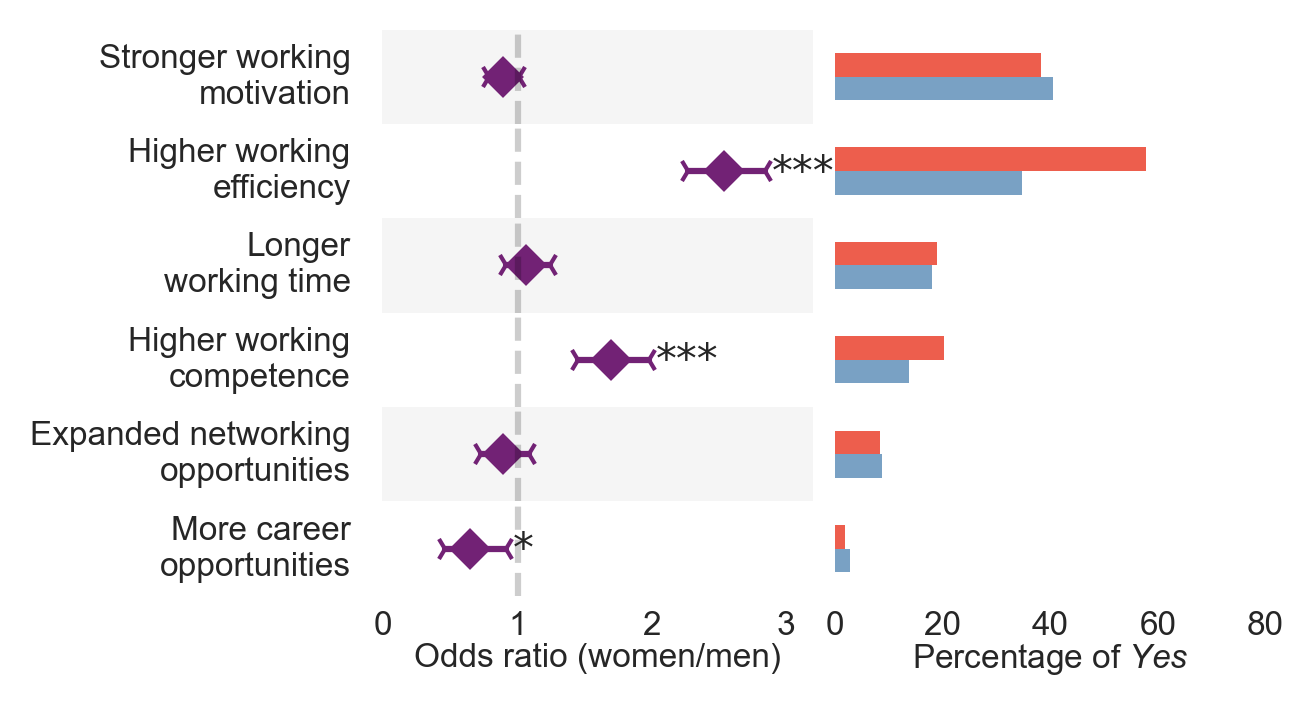

In [53]:
# draw graph
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="Q16 Strong")

questions = ['Stronger working\nmotivation',
'Higher working\nefficiency',
'Longer\nworking time',
'Higher working\ncompetence',
'Expanded networking\nopportunities',
'More career\nopportunities'
]

plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 2, sharex="col", figsize=(3.8,2.5), dpi=300)

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

try:
    for i in range(len(questions)):
        ax1 = ax[i][0]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)

            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                    [j] * 2,
                    color = palette[j],
                    label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                    [j],
                    marker="4",
                    color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                    [j],
                    marker="3",
                    color = palette[j])
            ax1.plot(df_odd.loc[cut, "Odds ratio (women/men)"].values[0],
                    [j],
                    marker="D",
                    color = palette[j])

            ax1.set_ylim(-0.5,0.5)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 1, linestyle ='--',color="black",alpha=0.1)
            ax1.tick_params(axis='both', labelsize=8)
            ax1.set_xlabel("Odds ratio (women/men)", y= 0.04, ha="center",va="center",fontsize=8)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")
                ax1.set_xlim(0,2.5)
            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.05,
                        j,
                       fullen(df_odd.loc[cut, "stars"].values[0]),font="DejaVu Sans")

        diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
        if not pd.isna(diffstar):
            ax1.text(1.45+0.1, 0.5, "("+diffstar+")")
except Exception as e:
        print(e)

# the right graph
mc =  [3]
mctext = ["non-parent","parent"]

for m in range(1):
    for q in range(len(questions)):
        n = mc[m]
        ax2 = ax[q][1]
        temp = res.loc[n, q].drop("Total",axis=0)
        if n == 2:
            ax2.barh([0.4,0.5], temp[1], align='center', height=.1, label="Agree",color=["#A8D2F7","#ED7947"],alpha=0.7)
        if n == 3:
            ax2.barh([0.15,0.25], temp[1], align='center', height=.1, label="Agree",color=["#4179AB","#E61A02"],alpha=0.7)

        ax2.set_xlabel("Percentage of $\mathit{Yes}$",y= 0.04, ha="center",va="center",fontsize=8,math_fontfamily='custom')
        if q != len(questions) -1:
            ax2.set_xlabel(None)
        ax2.tick_params(axis='both', labelsize=8)
        ax2.set_ylim(0,0.4)
        ax2.set_xlim(0,80)
        ax2.set_yticklabels([])
        
xmin, xmax = ax[0][0].get_xlim()
ax[0][0].set_xlim(xmin-0.01, xmax+0.7)
# xmin, xmax = ax[0][1].get_xlim()
# ax[0][1].set_xlim(xmin-0.01, xmax+0.34)
sns.despine(left=True, bottom=True, right=True)

plt.subplots_adjust(hspace = 0, wspace = 0.05)
plt.show()
fig.savefig('strong.png', bbox_inches='tight', pad_inches = 0)

In [27]:
# Concat all tables

a = pd.concat([table1,table2,table3,table4,table5],axis=0)
a = a.applymap(lambda x:"{:.2f}%".format(x) if isinstance(x,float) and np.isnan(x)==False and x < 100 else x.replace("nan","") if isinstance(x,str) else x)

a.to_excel(r"hehe.xlsx")

# Relative Publication

In [54]:
df2 = df[df["gender_new"]!="Non-binary"]
pd.pivot_table(df2, values = "rel_npap", index = "gender_new", columns = "married_child", aggfunc=np.mean)

married_child,0,1,2,3
gender_new,,,,
Men,1.721902,1.021639,1.710307,2.272928
Women,1.670728,1.702034,1.691704,1.814972


In [70]:
# def is_outlier(s, n):
#     lower_limit = s.mean() - (s.std() * n)
#     upper_limit = s.mean() + (s.std() * n)
#     return ~s.between(lower_limit, upper_limit)

rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career","All ranks"]
hue_order_set = ["Women", "Men","Total"]
questions =  ["rel_npap", "rel_cite","uni_cola"]

pre = df2[df2["married_child"].isin([2,3]) & ~df2["rel_npap"].isnull()]
print(len(pre))
#pre = pre[~pre.groupby(['area', "married_child"])['rel_npap'].apply(is_outlier, 5)]
table = pd.pivot_table(pre,
                        values = questions,
                        index = [ "rank", "gender_new"],
                        columns = "married_child",
                        aggfunc=[np.mean, len])

all_married = pd.pivot_table(pre,
                        values = questions,
                        index = [ "rank", "gender_new"],
                        aggfunc=[np.mean, len])
all_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_married.columns])
table = pd.concat([table,all_married],axis=1)

# mix all ranks
all_rank = pd.pivot_table(pre,
                          values = questions,
                          index = [ "gender_new"],
                          columns = "married_child",
                          aggfunc=[np.mean,len])
all_rank.index = pd.MultiIndex.from_product([["All ranks"], all_rank.index])

all_rank_married = pd.pivot_table(pre,
                        values = questions,
                        index = ["gender_new"],
                        aggfunc=[np.mean, len])
all_rank_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_rank_married.columns])
all_rank_married.index = pd.MultiIndex.from_tuples([("All ranks", x) for x in all_rank_married.index])
all_rank = pd.concat([all_rank,all_rank_married],axis=1)

# mix genders
total = pd.pivot_table(pre,
                          values = questions,
                          index = [ "rank"],
                          columns = "married_child",
                          aggfunc=[np.mean,len])
total.index = pd.MultiIndex.from_product([total.index, ["Total"]])

all_gender_married = pd.pivot_table(pre,
                        values = questions,
                        index = ["rank"],
                        aggfunc=[np.mean, len])
all_gender_married.columns = pd.MultiIndex.from_tuples([(x,y,"All") for x,y in all_gender_married.columns])
all_gender_married.index = pd.MultiIndex.from_tuples([(x, "Total") for x in all_gender_married.index])
total = pd.concat([total,all_gender_married],axis=1)

# mix genders and ranks
all_total = pd.pivot_table(pre,
                   values = questions,
                   columns = "married_child",
                   aggfunc=[np.mean,len]).stack(level=[0,1])

all_total_married = pre[questions].apply(func=[np.mean, len]).stack()
all_total_married.index = pd.MultiIndex.from_tuples([(y,x,"All") for x,y in all_total_married.index])
all_total = pd.concat([all_total,all_total_married])
all_total.name = ("All ranks", "Total")

table = pd.concat([table,all_rank,total]).swaplevel(0, 1,axis=1)
table = table.append(all_total)

# add regression info
df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="biblio_rank")

for s in range(len(questions)):
    for r in [2,3,"All"]:
        for k in range(len(rank_order)):
            if r == "All":
                cut = (df_odd["group"]==2) & (df_odd["question"]==s) & (df_odd["rank"]==k)
            else:
                cut = (df_odd["group"]==3-r) & (df_odd["question"]==s) & (df_odd["rank"]==k)
            coef = df_odd.loc[cut, "Coefficient"].values[0]
            stars = df_odd.loc[cut, "stars"].values[0]
            std = df_odd.loc[cut, "Std. err."].values[0]
            pval = df_odd.loc[cut,"P>z"].values[0]
            low, up = df_odd.loc[cut,"low"].values[0], df_odd.loc[cut,"up"].values[0]
            info = "{:.2f}[{:.2f},{:.2f}], p={:.3f}".format(coef, low, up, pval)
            table.loc[(rank_order[k],"Coef.(Women)"),(questions[s],"mean",r)] = info

table = pd.DataFrame(table,
                     index = pd.MultiIndex.from_product([rank_order,hue_order_set+["Coef.(Women)"]]),
                    columns = pd.MultiIndex.from_product([questions,["mean","len"],[2,3,"All"]]))
table.to_excel(r"hehe.xlsx")

6460


In [72]:
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career"]
married_child_order = [2,3]
estimant = "rel_npap"

res = pd.DataFrame(index=pd.MultiIndex.from_product([area_order,rank_order]),columns=married_child_order)
for area in area_order:
    for rank in rank_order:
        for m in married_child_order:
            T,pval =stats.ttest_ind(df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Men"),estimant].dropna(),
                                    df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Women"),estimant].dropna(),
                                   equal_var=False)
            res.loc[(area,rank),m] = pval

res

2         3
Natural Science & Engineering Trainee        0.786253  0.554215
                              Early Career   0.940299  0.566915
                              Middle Career  0.717627  0.250205
                              Late Career    0.542374  0.137441
Medical Sciences              Trainee        0.051153  0.063994
                              Early Career   0.590628    0.0242
                              Middle Career   0.75273   0.01555
                              Late Career    0.925725   0.00184
Social Sciences               Trainee        0.581211  0.853934
                              Early Career   0.788753   0.64024
                              Middle Career  0.598502  0.532281
                              Late Career    0.834211  0.597012

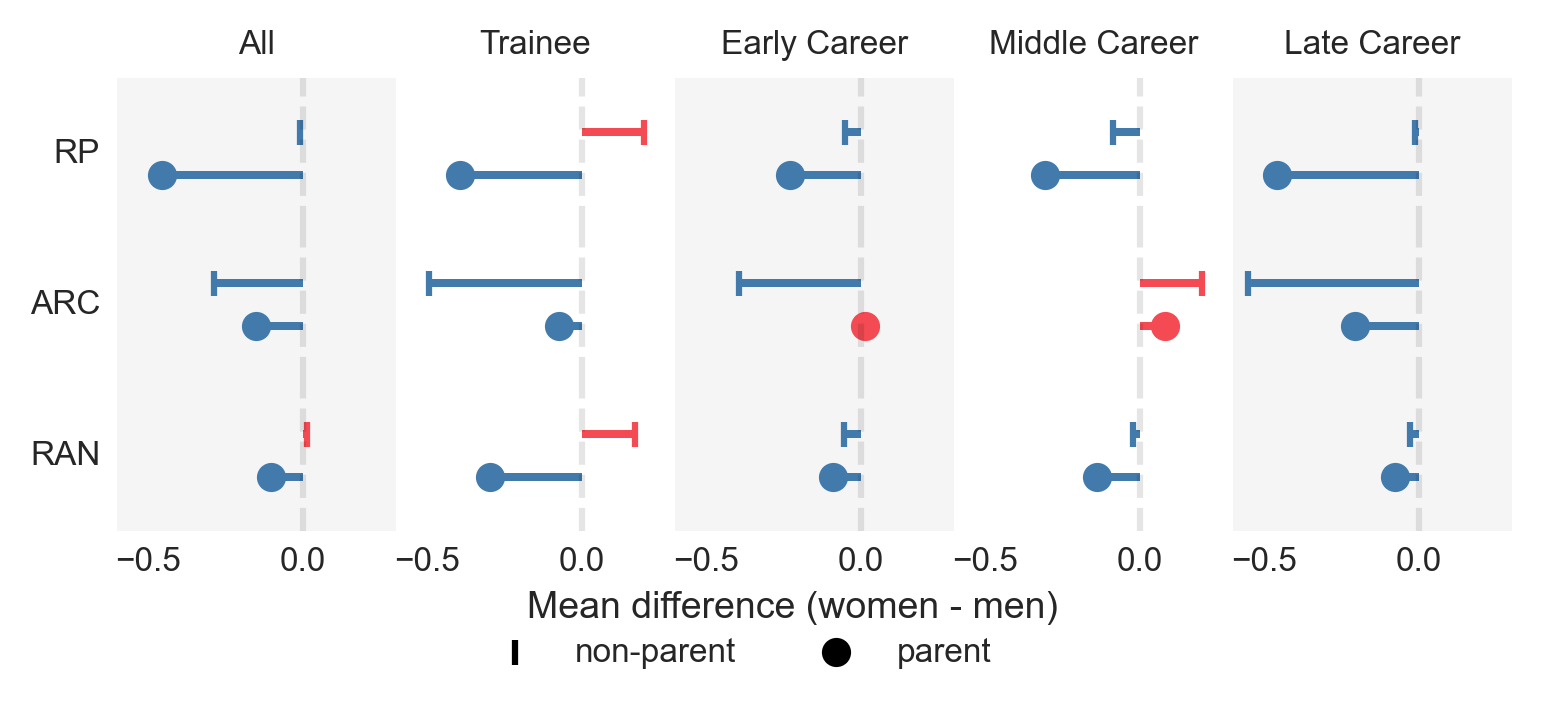

In [40]:
a_means = []
rank_order = ["All","Trainee", "Early Career", "Middle Career", "Late Career"]
val_order = ["ARP","ARC", "RAN"]
width = 0.04

for val in ["rel_npap","rel_cite","uni_cola"]:
    pre = df2[df2["married_child"].isin([2,3]) & ~df2["rel_npap"].isnull()] # & (df2["area"] !=  "Arts & Humanities")
    #pre = pre[~pre.groupby(['area', "married_child"])['rel_npap'].apply(is_outlier, 5)]
    pre0 = pd.pivot_table(pre,
                        values = val,
                        index = "gender_new",
                        columns = "married_child",
                        aggfunc=[np.mean, np.median])
    x = pd.concat([pre0], keys=['All'], names=['rank'])
    pre  = pd.pivot_table(pre,
                        values = val,
                        index = [ "rank", "gender_new"],
                        columns = "married_child",
                        aggfunc=[np.mean, np.median])
    pre= pd.concat([x,pre], axis=0)
    a = pre.diff().drop("Men", level="gender_new").droplevel(level="gender_new")
    a_mean = a["mean"].stack().reset_index()
    a_means.append(a_mean)

plt.style.use("seaborn-white")
fig, ax = plt.subplots(3,5, figsize=(6,2),dpi=300, sharey=True,sharex="col")

for i in range(len(a_means)):
    a_mean = a_means[i]
    for j in range(len(rank_order)):
        ax1 = ax[i][j]
        for m in [2,3]:
            data = a_mean.loc[(a_mean["married_child"]==m) & (a_mean["rank"] == rank_order[j]),0]
            colormat=np.where(data>0,"#F34A53","#417AAB")
            if m == 2:
                ax1.barh(0.5*width, data, height=0.007, color=colormat)
                ax1.scatter(data ,0.5*width, color=colormat,marker="|",label="non-parent")
            else:
                ax1.barh(-0.5*width, data, height=0.007, color=colormat)
                ax1.scatter(data ,-0.5*width, color=colormat,marker="o",label="parent")

        if j % 2==0:
            ax1.set_facecolor("whitesmoke")
        sns.despine(ax=ax1,left=True,top=True,right=True,bottom=True)

        ax1.legend_ = None
        ax1.set_ylim(-0.07,0.07)
        xmin, xmax = ax1.get_xlim()
        ax1.set_xlim(-0.6,0.3)
        ax1.axvline(x=0,linestyle="--",color="black",alpha=0.1)
        ax1.tick_params(axis="y", which='both',bottom=False,top=False,left=False,right=False,labelleft=False)
        ax1.tick_params(axis='both', which='both', labelsize=8)
        if j == 0:
            ax1.set_ylabel(val_order[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
        if i == 0:
            ax1.set_title(rank_order[j],fontsize=8)
    #     if i != 0:
    #         ax1.yaxis.set_visible(False)

#legend
h, l = ax[2][1].get_legend_handles_labels()
h1 = []
for shape in h:
    shape1 = copy.copy(shape)
    shape1.set_color("black")
    h1.append(shape1)
ax[2][2].legend(h1, l, bbox_to_anchor=(-0.8, -0.5), loc='upper left',ncol=2, fontsize=8)
fig.supxlabel("Mean difference (women - men)",y=-0.03, fontsize=9)
plt.subplots_adjust(hspace = 0, wspace = 0)
plt.show()
fig.savefig(r'biblio_line.png', bbox_inches='tight', pad_inches = 0)

In [27]:
df_rank_npaper = pd.pivot_table(df2, values = "rel_npap", index = [ "rank","gender_new"], columns = "married_child", aggfunc=np.mean)
df_rank_npaper

married_child                    0         1         2         3
rank          gender_new                                        
Early Career  Men         2.157790       NaN  1.702336  1.996114
              Women       2.100454  1.854931  1.660207  1.767033
Late Career   Men         2.054007       NaN  1.972815  2.564601
              Women       1.832788  2.401959  1.910572  2.094981
Middle Career Men         1.228487  0.792695  1.651377  1.930506
              Women       1.451177  1.100215  1.559368  1.629947
Trainee       Men         1.639818  1.250583  1.437561  1.851009
              Women       1.395469  1.520717  1.647416  1.475988

# Relative Citation

In [28]:
pd.pivot_table(df2, values = "rel_cite", index = "gender_new", columns = "married_child", aggfunc=np.mean)

married_child,0,1,2,3
gender_new,,,,
Men,2.518123,1.846120,2.185325,2.277898
Women,1.740007,2.307033,1.934873,2.139611


In [29]:
pre = df2[df2["married_child"].isin([2,3]) & ~df2["rel_npap"].isnull()]
#pre = pre[~pre.groupby(['area', "married_child"])['rel_cite'].apply(is_outlier, 5)]
df_area_cite = pd.pivot_table(pre,
                                values = "rel_cite",
                                index = [ "rank", "gender_new"],
                                columns = "married_child",
                                aggfunc=[np.mean, np.median,len])
df_area_cite.round(2)

mean       median        len      
married_child                2     3      2     3    2     3
rank          gender_new                                    
Early Career  Men         2.10  1.93   1.37  1.48  124   324
              Women       1.87  1.84   1.37  1.51  245   593
Late Career   Men         2.28  2.28   1.59  1.62  146  1223
              Women       2.08  2.19   1.48  1.68  208   987
Middle Career Men         1.66  1.91   1.07  1.37  156   697
              Women       1.72  1.94   1.30  1.38  241  1085
Trainee       Men         1.88  1.97   1.24  1.22  118   115
              Women       1.44  1.82   1.19  1.35  181   205

In [31]:
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career"]
married_child_order = [2,3]
estimant = "rel_cite"

res = pd.DataFrame(index=pd.MultiIndex.from_product([area_order,rank_order]),columns=married_child_order)
for area in area_order:
    for rank in rank_order:
        for m in married_child_order:
            T,pval =stats.ttest_ind(df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Men"),estimant],
                                    df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Women"),estimant],
                                    equal_var=False,
                                    nan_policy="omit")
            res.loc[(area,rank),m] = pval

res.astype(float).round(3)

2      3
Natural Science & Engineering Trainee        0.119  0.671
                              Early Career   0.614  0.461
                              Middle Career  0.530  0.461
                              Late Career    0.993  0.141
Medical Sciences              Trainee        0.125  0.148
                              Early Career   0.881  0.304
                              Middle Career  0.039  0.957
                              Late Career    0.746  0.550
Social Sciences               Trainee        0.475  0.512
                              Early Career   0.962  0.438
                              Middle Career  0.148  0.345
                              Late Career    0.041  0.295

In [32]:
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career"]
married_child_order = [2,3]
estimant = "rel_cite"

res = pd.DataFrame(index=pd.MultiIndex.from_product([area_order,rank_order]),columns=married_child_order)
for area in area_order:
    for rank in rank_order:
        for m in married_child_order:
            T,pval =stats.ttest_ind(df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Men"),estimant].dropna(),
                                    df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Women"),estimant].dropna(),
                                   equal_var=False)
            res.loc[(area,rank),m] = pval

res.astype("float64").round(3)

2      3
Natural Science & Engineering Trainee        0.119  0.671
                              Early Career   0.614  0.461
                              Middle Career  0.530  0.461
                              Late Career    0.993  0.141
Medical Sciences              Trainee        0.125  0.148
                              Early Career   0.881  0.304
                              Middle Career  0.039  0.957
                              Late Career    0.746  0.550
Social Sciences               Trainee        0.475  0.512
                              Early Career   0.962  0.438
                              Middle Career  0.148  0.345
                              Late Career    0.041  0.295

In [36]:
df_rank_npaper = pd.pivot_table(df2, values = "rel_cite", index = [ "rank","gender_new"], columns = "married_child", aggfunc=np.mean)
df_rank_npaper

married_child                    0         1         2         3
rank          gender_new                                        
Early Career  Men         1.465698       NaN  2.351059  1.957849
              Women       1.973278  1.320720  2.019057  1.976614
Late Career   Men         1.678982       NaN  2.680565  2.563178
              Women       1.773172  3.254118  2.151536  2.355440
Middle Career Men         2.130053  0.110600  1.785110  1.956640
              Women       1.806206  1.766432  2.008838  2.069699
Trainee       Men         3.850781  3.581640  1.875252  1.921418
              Women       1.416771  0.889540  1.418602  1.849790

# Collaborators

In [38]:
df_area_cite = pd.pivot_table(df2[df2["married_child"].isin([2,3])],
                                values = "uni_cola",
                                index = [ "area","rank", "gender_new"],
                                columns = "married_child",
                                aggfunc=[np.mean, np.median,len])
df_area_cite

mean            \
married_child                                                  2         3   
area                          rank          gender_new                       
Arts & Humanities             Early Career  Men         0.596686  0.550558   
                                            Women       0.941250  0.578642   
                              Late Career   Men         0.286838  0.405305   
                                            Women       0.241401  0.500132   
                              Middle Career Men         0.445793  0.611286   
                                            Women       0.453749  0.535955   
                              Trainee       Men         0.639107  0.900509   
                                            Women       1.950468  0.695976   
Medical Sciences              Early Career  Men         1.313381  1.292253   
                                            Women       1.229898  1.191331   
                              Late Career   Men         1.201442  1.474183   
                                            Women       1.086134  1.269588   
                              Middle Career Men         1.203796  1.296941   
                                            Women       1.113788  1.063760   
                              Trainee       Men         0.867059  1.874172   
                                            Women       1.187669  0.809381   
Natural Science & Engineering Early Career  Men         1.002221  1.258961   
                                            Women       1.146683  1.183733   
                              Late Career   Men         1.094837  1.092648   
                                            Women       1.006000  1.050713   
                              Middle Career Men         1.065237  1.082923   
                                            Women       1.026931  1.078556   
                              Trainee       Men         1.010184  1.217165   
                                            Women       1.098309  1.128796   
Social Sciences               Early Career  Men         1.021997  0.953298   
                                            Women       0.812041  0.911445   
                              Late Career   Men         0.502968  0.564543   
                                            Women       0.466339  0.603446   
                              Middle Career Men         0.454907  0.676945   
                                            Women       0.729832  0.633877   
                              Trainee       Men         0.864024  0.556390   
                                            Women       1.020643  1.566608   

                                                          median            \
married_child                                                  2         3   
area                          rank          gender_new                       
Arts & Humanities             Early Career  Men         0.599162  0.695976   
                                            Women       0.581006  0.442310   
                              Late Career   Men         0.122370  0.158456   
                                            Women       0.122777  0.238757   
                              Middle Career Men         0.442310  0.355992   
                                            Women       0.205773  0.290503   
                              Trainee       Men         0.871509  0.871509   
                                            Women       1.950468  0.695976   
Medical Sciences              Early Career  Men         1.011840  0.936648   
                                            Women       0.874312  0.846836   
                              Late Career   Men         0.564326  0.826239   
                                            Women       0.575657  0.847741   
                              Middle Career Men         0.769046  0.832434   
                                            Women       0.789213  0.666823   
   

In [43]:
df_area_cite = pd.pivot_table(df2[df2["married_child"].isin([2,3])],
                                values = "uni_cola",
                                index = [ "rank", "gender_new"],
                                columns = "married_child",
                                aggfunc=[np.mean, np.median,len])
df_area_cite.round(2)

mean       median        len      
married_child                2     3      2     3    2     3
rank          gender_new                                    
Early Career  Men         1.09  1.19   0.89  0.83  132   336
              Women       1.05  1.10   0.78  0.80  265   626
Late Career   Men         0.88  1.06   0.48  0.62  159  1337
              Women       0.83  0.98   0.48  0.64  231  1115
Middle Career Men         0.92  1.04   0.58  0.66  174   747
              Women       0.90  0.91   0.62  0.59  268  1183
Trainee       Men         0.94  1.37   0.78  0.72  122   118
              Women       1.13  1.07   0.86  0.73  183   208

In [44]:
area_order = ["Natural Science & Engineering", "Medical Sciences", "Social Sciences"]
rank_order = ["Trainee", "Early Career", "Middle Career", "Late Career"]
married_child_order = [2,3]
estimant = "uni_cola"

res = pd.DataFrame(index=pd.MultiIndex.from_product([area_order,rank_order]),columns=married_child_order)
for area in area_order:
    for rank in rank_order:
        for m in married_child_order:
            T,pval =stats.ttest_ind(df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Men"),estimant],
                                    df2.loc[(df2["married_child"]==m) & (df2["area"] == area) & (df2["rank"] == rank) & (df2["gender_new"] == "Women"),estimant],
                                    equal_var=True,
                                    nan_policy="omit")
            res.loc[(area,rank),m] = pval

res

2         3
Natural Science & Engineering Trainee        0.638513  0.712217
                              Early Career    0.43576  0.684215
                              Middle Career  0.852047  0.968265
                              Late Career    0.665281  0.652649
Medical Sciences              Trainee        0.140034  0.000633
                              Early Career   0.745437  0.422629
                              Middle Career  0.778748  0.028605
                              Late Career    0.739985   0.08702
Social Sciences               Trainee        0.480512  0.293236
                              Early Career   0.139225  0.802824
                              Middle Career  0.014915  0.437175
                              Late Career    0.723148  0.480207

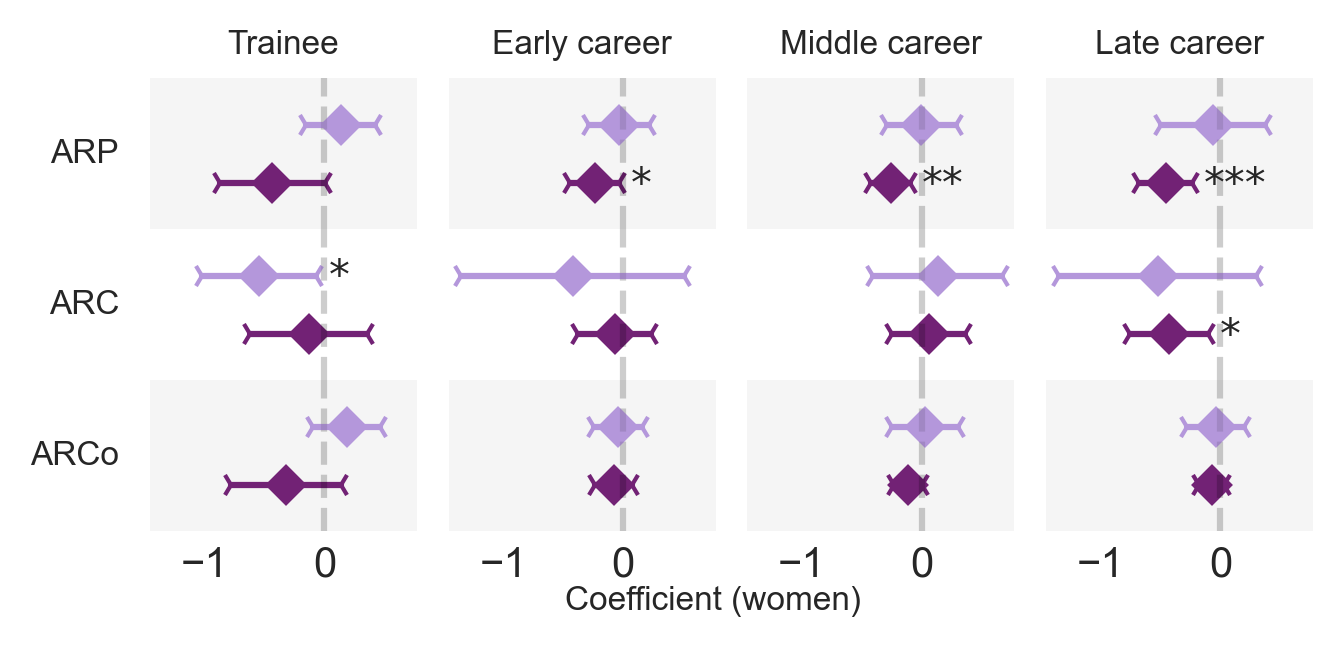

In [59]:
# draw graph
temp = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="biblio_rank")
df2 =temp[temp["rank"]==0]
df3 = temp[temp["rank"]==1]
df4 =temp[temp["rank"]==2]
df5 = temp[temp["rank"]==3]
dfs = [df2, df3, df4, df5]
questions = ["ARP",
            "ARC",
            "ARCo",]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(len(questions), 4, sharex=True, figsize=(5,2), dpi=300)

hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

for d in range(len(dfs)):
    df_odd = dfs[d]
    for i in range(len(questions)):
        ax1 = ax[i][d]
        for j in range(len(hue_order_set)):
            cut = (df_odd["group"]==j) & (df_odd["question"]==i)
            ax1.plot(df_odd.loc[cut, ["low","up"]].values[0],
                   [j] * 2,
                  color = palette[j],
                  label = hue_order_set[j])
            # add dots
            ax1.plot(df_odd.loc[cut, "low"].values[0],
                   [j],
                   marker="4",
                  color = palette[j])
            ax1.plot(df_odd.loc[cut, "up"].values[0],
                   [j],
                   marker="3",
                  color = palette[j])
            ax1.plot(df_odd.loc[cut, "Coefficient"].values[0],
                   [j],
                   marker="D",
                  color = palette[j])
        
            ax1.set_ylim(-0.8,1.8)
            ax1.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
            ax1.set_yticklabels([])
            ax1.axvline(x = 0, linestyle ='--',color="black",alpha=0.1)
            if i % 2==0:
                ax1.set_facecolor("whitesmoke")
            if d != 0:
                ax1.yaxis.set_visible(False)
            #add significance stars
            if not df_odd.loc[cut, "stars"].isnull().all():
                ax1.text(df_odd.loc[cut, "up"].values[0]+0.1,
                        j,
                        fullen(df_odd.loc[cut, "stars"].values[0]),
                        font="DejaVu Sans")

#         diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
#         if not pd.isna(diffstar):
#             ax1.text(0.3+0.1, 0.5, "("+fullen(diffstar)+")",font="DejaVu Sans",fontsize=8)

sns.despine(left=True, bottom=True, right=True)
ax[0][0].set_title("Trainee",fontsize=8)
ax[0][1].set_title("Early career",fontsize=8)
ax[0][2].set_title("Middle career",fontsize=8)
ax[0][3].set_title("Late career",fontsize=8)

fig.supxlabel("Coefficient (women)", fontsize=8,ha="center",va="center")

plt.subplots_adjust(hspace = 0, wspace = 0.12)
plt.show()
fig.savefig(r'biblio.png', bbox_inches='tight', pad_inches = 0)

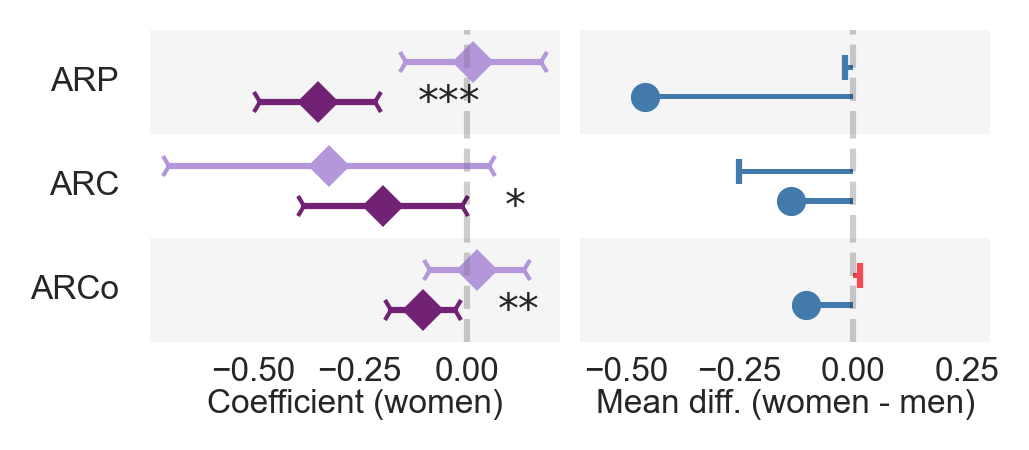

In [13]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(3,2, figsize=(3.5,1.6),dpi=300, sharex="col")

a_means = []
questions = ["ARP","ARC", "ARCo"]
width = 0.04

# left graph

df_odd = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="biblio")
temp = pd.read_excel(os.path.join(root, r"ologit_res.xlsx"), sheet_name="biblio_rank")
hue_order_set = ["parent", "non-parent"]
palette = ["#722275","#B497DB"]

for i in range(len(questions)):
    ax2 = ax[i][0]
    for j in range(len(hue_order_set)):
        cut = (df_odd["group"]==j) & (df_odd["question"]==i)
        ax2.plot(df_odd.loc[cut, ["low","up"]].values[0],
               [j] * 2,
              color = palette[j],
              label = hue_order_set[j])
        # add dots
        ax2.plot(df_odd.loc[cut, "low"].values[0],
               [j],
               marker="4",
              color = palette[j])
        ax2.plot(df_odd.loc[cut, "up"].values[0],
               [j],
               marker="3",
              color = palette[j])
        ax2.plot(df_odd.loc[cut, "Coefficient"].values[0],
               [j],
               marker="D",
              color = palette[j])

        ax2.set_ylim(-0.8,1.8)
        ax2.set_ylabel(questions[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)
        ax2.set_yticklabels([])
        ax2.axvline(x = 0, linestyle ='--',color="black",alpha=0.1)
        ax2.tick_params(axis='both', which='both', labelsize=8)
        if i % 2==0:
            ax2.set_facecolor("whitesmoke")
        if i == len(questions)-1:
            ax2.set_xlabel("Coefficient (women)", fontsize=8,ha="center",va="center")
                
        #add significance stars
        if not df_odd.loc[cut, "stars"].isnull().all():
            ax2.text(df_odd.loc[cut, "up"].values[0]+0.1,
                    j,
                    fullen(df_odd.loc[cut, "stars"].values[0]),
                    font="DejaVu Sans")

    diffstar =  df_odd.loc[(df_odd["group"]==1) & (df_odd["question"]==i), "dstars"].values[0]
    if not pd.isna(diffstar):
        ax2.text(0.3+0.1, 0.5, "("+fullen(diffstar)+")",font="DejaVu Sans",fontsize=8)

sns.despine(left=True, bottom=True, right=True)

# right graph

for val in ["rel_npap","rel_cite","uni_cola"]:
    pre = df2[df2["married_child"].isin([2,3]) & ~df2["rel_npap"].isnull()]
    pre0 = pd.pivot_table(pre,
                        values = val,
                        index = "gender_new",
                        columns = "married_child",
                        aggfunc=[np.mean, np.median])
    pre = pd.concat([pre0], keys=['All'], names=['rank'])
    a = pre.diff().drop("Men", level="gender_new").droplevel(level="gender_new")
    a_mean = a["mean"].stack().reset_index()
    a_means.append(a_mean)

for i in range(len(a_means)):
    a_mean = a_means[i]
    ax1 = ax[i][1]
    for m in [2,3]:
        data = a_mean.loc[a_mean["married_child"]==m,0]
        colormat=np.where(data>0,"#F34A53","#417AAB")
        if m == 2:
            ax1.barh(0.5*width, data, height=0.007, color=colormat)
            ax1.scatter(data ,0.5*width, color=colormat,marker="|",label="non-parent")
        else:
            ax1.barh(-0.5*width, data, height=0.007, color=colormat)
            ax1.scatter(data ,-0.5*width, color=colormat,marker="o",label="parent")
            if i == len(a_means)-1:
                ax1.set_xlabel("Mean diff. (women - men)", fontsize=8,ha="center",va="center")

        if i % 2==0:
            ax1.set_facecolor("whitesmoke")
        sns.despine(ax=ax1,left=True,top=True,right=True,bottom=True)

        ax1.legend_ = None
        ax1.set_ylim(-0.07,0.07)
        xmin, xmax = ax1.get_xlim()
        ax1.set_xlim(-0.6,0.3)
        ax1.axvline(x=0,linestyle="--",color="black",alpha=0.1)
        ax1.tick_params(axis="y", which='both',bottom=False,top=False,left=False,right=False,labelleft=False)
        ax1.tick_params(axis='both', which='both', labelsize=8)
        if j == 0:
            ax1.set_ylabel(val_order[i],rotation=0, ha='right',ma='right',va="center",fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0.05)
plt.show()
fig.savefig(r"biblio2.png",dpi=300)